In [37]:
import pandas as pd

df = pd.read_csv("Dados Brutos pHDosado - Completo.csv")
df


,ID,timezone,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
0,393652,2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.312500,73.843750
1,393653,2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.343750,73.875000
2,393654,2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.406250,73.875000
3,393655,2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.500000,73.843750
4,393656,2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.250000,73.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
1811892,389691,2024-09-11 11:59:46,7.6230,25.206249,837.750,0.0,20.454374,0.800000,25.206249,69.303125,100.696875,19.168751
1811893,389692,2024-09-11 11:59:49,7.6230,25.228125,837.000,0.0,20.454374,0.800000,25.228125,69.331250,100.896875,19.262501
1811894,389693,2024-09-11 11:59:52,7.6230,25.196875,837.375,0.0,20.454374,0.801562,25.196875,69.315625,101.046875,19.168751
1811895,389694,2024-09-11 11:59:55,7.6125,25.275000,834.750,0.0,20.454374,0.804688,25.275000,69.240625,100.721875,19.043751


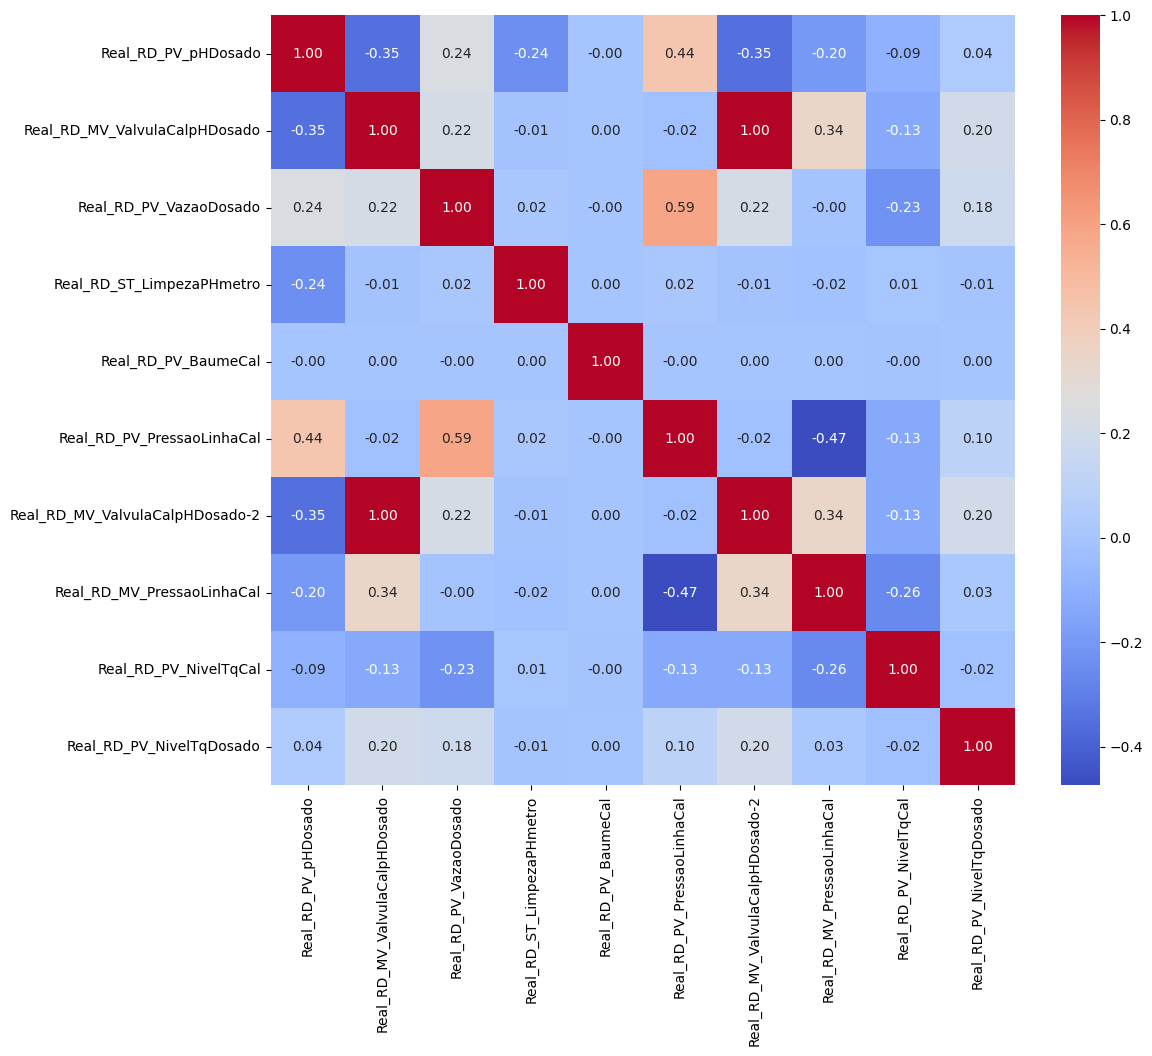

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# remove a coluna 'timezone', 'ID'
df_corr = df.drop(['ID', 'timezone'], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [39]:
df = df.drop(['Real_RD_MV_ValvulaCalpHDosado-2'], axis=1)
# to datetime
df['timezone'] = pd.to_datetime(df['timezone'])

In [40]:
# print nan values
print(df.isnull().sum())

# show nan values
df[df.isnull().any(axis=1)]

# remove nan values
df = df.dropna()

# show nan values
df[df.isnull().any(axis=1)]

ID                                0
timezone                          0
Real_RD_PV_pHDosado              89
Real_RD_MV_ValvulaCalpHDosado    97
Real_RD_PV_VazaoDosado           64
Real_RD_ST_LimpezaPHmetro        99
Real_RD_PV_BaumeCal              89
Real_RD_PV_PressaoLinhaCal       88
Real_RD_MV_PressaoLinhaCal       51
Real_RD_PV_NivelTqCal            92
Real_RD_PV_NivelTqDosado         61
dtype: int64


,ID,timezone,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado


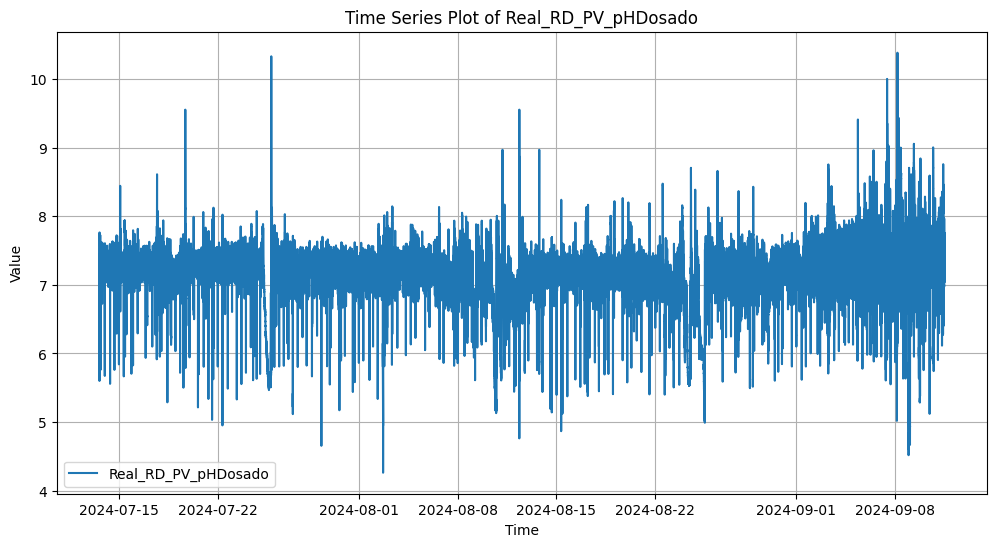

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the target column
plt.figure(figsize=(12, 6))
plt.plot(df["timezone"], df["Real_RD_PV_pHDosado"], label="Real_RD_PV_pHDosado")
plt.title("Time Series Plot of Real_RD_PV_pHDosado")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()


In [24]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(df, target_column, significance_level=0.05):
    """
    Tests the stationarity of time series data using ADF and KPSS tests.

    Parameters:
        df (pd.DataFrame): The dataset containing time series data.
        target_column (str): The target variable column name.
        significance_level (float): The threshold for p-value significance.

    Returns:
        dict: Stationarity results for each column.
    """
    results = {}
    columns_to_test = [col for col in df.columns if col not in ['ID', 'timezone']]
    
    for column in columns_to_test:
        series = df[column].dropna()
        adf_result = adfuller(series)
        kpss_result = kpss(series, regression='ct')
        
        results[column] = {
            "ADF Test Statistic": adf_result[0],
            "ADF p-value": adf_result[1],
            "ADF Stationary": adf_result[1] < significance_level,
            "KPSS Test Statistic": kpss_result[0],
            "KPSS p-value": kpss_result[1],
            "KPSS Stationary": kpss_result[1] > significance_level,
        }
    
    # Print results for the target column specifically
    print(f"Results for target column '{target_column}':")
    print(results[target_column])
    
    return results


df_test = df.set_index('timezone')
df_sample = df_test.iloc[:100000]
results = test_stationarity(df_sample, target_column='Real_RD_PV_pHDosado')
results

C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in

Results for target column 'Real_RD_PV_pHDosado':
{'ADF Test Statistic': -19.5345142007468, 'ADF p-value': 0.0, 'ADF Stationary': True, 'KPSS Test Statistic': 0.06860451707871904, 'KPSS p-value': 0.1, 'KPSS Stationary': True}


C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='ct')


{'Real_RD_PV_pHDosado': {'ADF Test Statistic': -19.5345142007468,
  'ADF p-value': 0.0,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.06860451707871904,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_MV_ValvulaCalpHDosado': {'ADF Test Statistic': -13.074397639385685,
  'ADF p-value': 1.9274480613246058e-24,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.3341749095590631,
  'KPSS p-value': 0.01,
  'KPSS Stationary': False},
 'Real_RD_PV_VazaoDosado': {'ADF Test Statistic': -6.149508472291109,
  'ADF p-value': 7.622579281106026e-08,
  'ADF Stationary': True,
  'KPSS Test Statistic': 1.9679844717939008,
  'KPSS p-value': 0.01,
  'KPSS Stationary': False},
 'Real_RD_ST_LimpezaPHmetro': {'ADF Test Statistic': -17.699334577338554,
  'ADF p-value': 3.5428014975297065e-30,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.0714002835871383,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_PV_BaumeCal': {'ADF Test Statistic': -316.22618487379765,
  'ADF 

### Data non Stationary so need to alter it to stationary

In [ ]:
import numpy as np

def make__dataset_stationary(df, columns):
    """
    Makes non-stationary time series data stationary by differencing.
    
    Parameters:
        df (pd.DataFrame): The dataset.
        columns (list): List of columns to be checked and made stationary.
        
    Returns:
        pd.DataFrame: The modified dataframe with stationary columns.
    """
    for col in columns:
        # Apply differencing if the series is non-stationary (based on KPSS test)
        if col in ['Real_RD_MV_ValvulaCalpHDosado', 'Real_RD_PV_VazaoDosado', 
                   'Real_RD_MV_PressaoLinhaCal', 'Real_RD_PV_NivelTqCal', 
                   'Real_RD_PV_NivelTqDosado']:
            df[col] = df[col].diff().dropna()
            print(f"Applied differencing to {col}")
        # Optionally, apply log transformation before differencing if data shows exponential growth
        # if some_condition:  
        #     df[col] = np.log(df[col])
        
    return df

# Apply the function to make columns stationary
df_stationary = make_stationary(df, df.columns)

Applied differencing to Real_RD_MV_ValvulaCalpHDosado
Applied differencing to Real_RD_PV_VazaoDosado
Applied differencing to Real_RD_MV_PressaoLinhaCal
Applied differencing to Real_RD_PV_NivelTqCal
Applied differencing to Real_RD_PV_NivelTqDosado


In [43]:
df_stationary

,ID,timezone,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
0,393652,2024-07-13 14:28:22,7.1260,NaN,NaN,0.0,20.454374,0.798437,NaN,NaN,NaN
1,393653,2024-07-13 14:28:25,7.1225,0.049999,0.000,0.0,20.454374,0.798437,0.031250,0.03125,0.03125
2,393654,2024-07-13 14:28:28,7.1225,0.009377,0.000,0.0,20.454374,0.796875,-0.018750,0.06250,0.00000
3,393655,2024-07-13 14:28:31,7.1260,0.143749,0.000,0.0,20.454374,0.798437,0.037500,0.09375,-0.03125
4,393656,2024-07-13 14:28:34,7.1225,-0.112499,0.750,0.0,20.454374,0.798437,-0.034375,-0.25000,0.03125
...,...,...,...,...,...,...,...,...,...,...,...
1811892,389691,2024-09-11 11:59:46,7.6230,-0.025002,0.000,0.0,20.454374,0.800000,0.034375,-0.12500,-0.03125
1811893,389692,2024-09-11 11:59:49,7.6230,0.021875,-0.750,0.0,20.454374,0.800000,0.028125,0.20000,0.09375
1811894,389693,2024-09-11 11:59:52,7.6230,-0.031250,0.375,0.0,20.454374,0.801562,-0.015625,0.15000,-0.09375
1811895,389694,2024-09-11 11:59:55,7.6125,0.078125,-2.625,0.0,20.454374,0.804688,-0.075000,-0.32500,-0.12500


In [45]:
# print nan values
print(df.isnull().sum())

# show nan values
df[df.isnull().any(axis=1)]

# remove nan values
df = df.dropna()

# show nan values
df[df.isnull().any(axis=1)]

ID                               0
timezone                         0
Real_RD_PV_pHDosado              0
Real_RD_MV_ValvulaCalpHDosado    1
Real_RD_PV_VazaoDosado           1
Real_RD_ST_LimpezaPHmetro        0
Real_RD_PV_BaumeCal              0
Real_RD_PV_PressaoLinhaCal       0
Real_RD_MV_PressaoLinhaCal       1
Real_RD_PV_NivelTqCal            1
Real_RD_PV_NivelTqDosado         1
dtype: int64


,ID,timezone,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado


In [47]:
# make sample of the stationary dataset
df_stationary_sample = df_stationary.iloc[:100000]

# Set the 'timezone' column as the index
df_stationary_sample = df_stationary_sample.set_index('timezone')

# Test the stationarity of the modified dataset
results = test_stationarity(df_stationary_sample, target_column='Real_RD_PV_pHDosado')

C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct')
C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in

Results for target column 'Real_RD_PV_pHDosado':
{'ADF Test Statistic': -19.5345142007468, 'ADF p-value': 0.0, 'ADF Stationary': True, 'KPSS Test Statistic': 0.06860451707871904, 'KPSS p-value': 0.1, 'KPSS Stationary': True}


C:\Users\joaos\AppData\Local\Temp\ipykernel_17368\2720964525.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct')


### Dataset correctly transformed to stationary

In [48]:
results

{'Real_RD_PV_pHDosado': {'ADF Test Statistic': -19.5345142007468,
  'ADF p-value': 0.0,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.06860451707871904,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_MV_ValvulaCalpHDosado': {'ADF Test Statistic': -39.900977290686825,
  'ADF p-value': 0.0,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.0020190373342114923,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_PV_VazaoDosado': {'ADF Test Statistic': -39.82800189199721,
  'ADF p-value': 0.0,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.007269921811210416,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_ST_LimpezaPHmetro': {'ADF Test Statistic': -17.699334577338554,
  'ADF p-value': 3.5428014975297065e-30,
  'ADF Stationary': True,
  'KPSS Test Statistic': 0.0714002835871383,
  'KPSS p-value': 0.1,
  'KPSS Stationary': True},
 'Real_RD_PV_BaumeCal': {'ADF Test Statistic': -316.22618487379765,
  'ADF p-value': 0.0,
  'ADF Stationary': T

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Função para carregar e preparar os dados
def prepare_data(df, target_column, test_size=0.2, sample_size=None):
    # Selecionar amostra, se especificado
    if sample_size:
        df = df.sample(n=sample_size, random_state=42)

    X = df.drop(columns=[target_column, 'ID', 'timezone'])
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Função para testar vários modelos de ML
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "XGBoost": XGBRegressor(),
        "MLP Regressor": MLPRegressor(max_iter=500)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    
    return results

# Função para criar e treinar redes neurais personalizadas
def train_neural_network(X_train, X_test, y_train, y_test, layers=[64, 32], dropout=0.2, learning_rate=0.001, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_dim=X_train.shape[1]))
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)
    
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return model, rmse

# Função principal para pipeline completo
def main_pipeline(dataset_path, target_column, sample_size=None):
    df = pd.read_csv(dataset_path)  # Substitua pelo caminho do dataset
    X_train, X_test, y_train, y_test = prepare_data(df, target_column, sample_size=sample_size)
    
    # Avaliar modelos de ML
    results = evaluate_models(X_train, X_test, y_train, y_test)
    print("Resultados dos modelos de ML:", results)
    
    # Treinar rede neural
    nn_model, nn_rmse = train_neural_network(X_train.values, X_test.values, y_train.values, y_test.values)
    print("Rede Neural RMSE:", nn_rmse)
    
    # Comparar os resultados
    results["Neural Network"] = nn_rmse
    best_model = min(results, key=results.get)
    print(f"O melhor modelo é: {best_model} com RMSE = {results[best_model]}")

    return results, nn_model if best_model == "Neural Network" else None

# Executar pipeline
# Exemplo: main_pipeline("caminho_para_seu_dataset.csv", "Real_RD_PV_pHDosado", sample_size=10000)
